In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Get Columns Name

In [2]:
f = open("adult.names", "r")
myline = f.readline()
c = 0
listColumns = []
while myline:
    if c > 95:
        listColumns.append(myline)
    myline = f.readline()
    c += 1
f.close()
# print(columns)
for i in range(len(listColumns)):
    listColumns[i] = listColumns[i].split(':')
    listColumns[i] = listColumns[i][0]
listColumns.append('Class')

In [3]:
listColumns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Class']

In [4]:
dataset = pd.read_csv('adult.data', names=listColumns, index_col=False, sep=', ')
dataset

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Class             object
dtype: object

# Cek value unik tiap kolom

In [6]:
for item in listColumns:
    print(item)
    print(dataset[item].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

In the workclass column, occupation and native-country have a value that is valued '?' our assumption is the value has a null value. And the three variables are categorical variables. If the value is empty, it is likely that it will be dropped. 

In [7]:
# Total record of data
dataset.shape

(32561, 15)

In [8]:
dataset.isnull().sum()
# Data ternyata tidak dapat terbaca menggunakan isnull biasa sehingga akan dipreprocess kemudian selanjutnya didrop

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Class             0
dtype: int64

In [9]:
dataset[dataset == '?'] = np.nan
dataset.isnull().sum()

C:\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Class                0
dtype: int64

With 32561 we dont really lose information about droping about 4000 record (if the value above is not in the same record). So we decided to drop the record

In [10]:
dataset = dataset.dropna()

In [11]:
dataset.shape

(30162, 15)

# Labeling the class

In [12]:
# Labeling the class data
# Changing the income column into Numerical Value
dataset['Class'] = dataset['Class'].map({'<=50K':0, '>50K':1})

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Education and Education-Num

In [13]:
dataset[['education', 'education-num']].head()

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13


turns out the education-num is number representation of education so we just need to choose 1, we decided to keep the integer value because most of modeling works better on integer variables

In [14]:
dataset = dataset.drop(['education'], axis=1)

In [15]:
dataset.head(1)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


# Explorating the String variables

In [16]:
dataset['workclass'].unique()
# nothing wrong with this variable

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [17]:
dataset['marital-status'].unique()
# nothing wrong with this variable

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [18]:
dataset['occupation'].unique()
# nothing wrong with this variable

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [19]:
dataset['relationship'].unique()
# nothing wrong with this variable

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [20]:
dataset['race'].unique()
# nothing wrong with this variable

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [21]:
dataset['sex'].unique()
# nothing wrong with this variable

array(['Male', 'Female'], dtype=object)

In [22]:
dataset['native-country'].unique()
# nothing wrong with this variable

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

as we stated above about modeling using machine learning model some algorithm works better (faster computing) with integer valuable so we will use label encode

In [23]:
leWC = preprocessing.LabelEncoder()
leWC.fit(dataset['workclass'])
dataset['workclass'] = leWC.transform(dataset['workclass'])
# incase we need the actual value we can call this
# actualWC = leWC.inverse_transform(dataset['workclass'])
# actualWC
# dataset['workclass'] =  actualWC

In [24]:
leMS = preprocessing.LabelEncoder()
leMS.fit(dataset['marital-status'])
dataset['marital-status'] = leMS.transform(dataset['marital-status'])
# incase we need the actual value we can call this
# actualMS = leMS.inverse_transform(dataset['marital-status'])
# actualMS
# dataset['marital-status'] =  actualMS

In [25]:
leOC = preprocessing.LabelEncoder()
leOC.fit(dataset['occupation'])
dataset['occupation'] = leOC.transform(dataset['occupation'])
# incase we need the actual value we can call this
# actualOC = leOC.inverse_transform(dataset['occupation'])
# actualOC
# dataset['occupation'] =  actualOC

In [26]:
leRE = preprocessing.LabelEncoder()
leRE.fit(dataset['relationship'])
dataset['relationship'] = leRE.transform(dataset['relationship'])
# incase we need the actual value we can call this
# actualRE = leRE.inverse_transform(dataset['relationship'])
# actualRE
# dataset['relationship'] =  actualRE

In [27]:
leRC = preprocessing.LabelEncoder()
leRC.fit(dataset['race'])
dataset['race'] = leRC.transform(dataset['race'])
# incase we need the actual value we can call this
# actualRC = leRC.inverse_transform(dataset['race'])
# actualRC
# dataset['race'] =  actualRC

In [28]:
leSX = preprocessing.LabelEncoder()
leSX.fit(dataset['sex'])
dataset['sex'] = leSX.transform(dataset['sex'])
# incase we need the actual value we can call this
# actualSX = leSX.inverse_transform(dataset['sex'])
# actualSX
# dataset['sex'] =  actualSX

In [29]:
leNC = preprocessing.LabelEncoder()
leNC.fit(dataset['native-country'])
dataset['native-country'] = leNC.transform(dataset['native-country'])
# incase we need the actual value we can call this
# actualNC = leNC.inverse_transform(dataset['native-country'])
# actualNC
# dataset['native-country'] =  actualNC

In [30]:
dataset.head(1)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,39,5,77516,13,4,0,1,4,1,2174,0,40,38,0


# Check integer Value

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


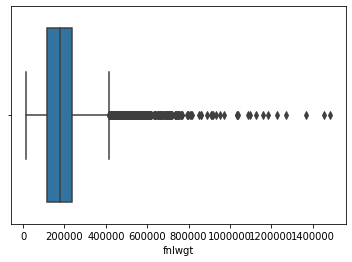

In [31]:
sns.boxplot(dataset['fnlwgt'])

In [32]:
print(dataset['fnlwgt'].nunique())
# feels like everyone got their fnlwgt so we can drop the columns
dataset = dataset.drop(['fnlwgt'], axis=1)

20263


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
4568,18,2,9,4,10,3,4,1,34095,0,3,38,0
6433,27,2,1,2,4,2,4,1,41310,0,24,25,0
7186,19,2,9,4,7,3,4,0,34095,0,20,38,0
15376,55,4,9,0,3,1,4,1,34095,0,60,38,0
20176,63,4,14,2,4,0,4,1,41310,0,50,38,0


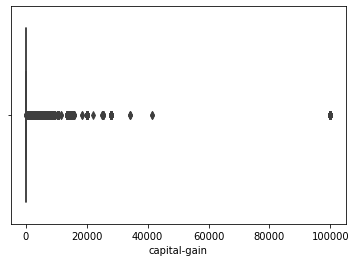

In [33]:
sns.boxplot(dataset['capital-gain'])
dataset.loc[ (dataset['capital-gain'] >= 30000) & (dataset['capital-gain'] != 99999) ]

In [34]:
dataset.loc[ dataset['capital-gain'] == 99999 ]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
1246,54,3,15,2,9,0,4,1,99999,0,60,38,1
1368,52,2,9,2,3,0,1,1,99999,0,40,23,1
1482,53,3,9,2,11,0,4,1,99999,0,40,38,1
1528,52,2,13,2,3,0,4,1,99999,0,50,38,1
1616,46,2,15,2,9,0,4,1,99999,0,60,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,22,4,10,4,11,3,2,1,99999,0,55,38,1
31828,47,2,14,2,3,0,4,1,99999,0,55,38,1
31972,43,3,15,2,3,0,4,1,99999,0,40,38,1
32238,47,2,15,2,3,0,4,1,99999,0,40,38,1


99999 value for 148 record I dont think this data is real, our assumption is this is bad record from the inputation so we decided to remove it

In [35]:
dataset = dataset.loc[ dataset['capital-gain'] != 99999 ]

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


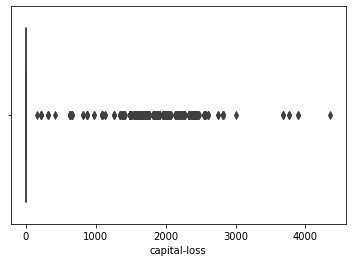

In [36]:
sns.boxplot(dataset['capital-loss'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


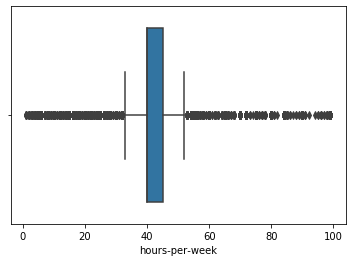

In [37]:
sns.boxplot(dataset['hours-per-week'])

# Feature Engineering

In [38]:
# Add new variables about capital difference and delete the columns that makes it
capitalDifference = dataset['capital-gain'] - dataset['capital-loss']
dataset = dataset.drop(['capital-gain', 'capital-loss'], axis=1)
dataset.insert(len(dataset.columns)-1,'capital-difference',capitalDifference)

# Check the correlation

In [39]:
dataset.corr().Class.sort_values() 

relationship         -0.249025
marital-status       -0.192288
workclass             0.014641
native-country        0.022821
occupation            0.049795
race                  0.071458
sex                   0.215210
hours-per-week        0.225425
age                   0.239325
capital-difference    0.280177
education-num         0.329919
Class                 1.000000
Name: Class, dtype: float64

# Explore low correlated columns

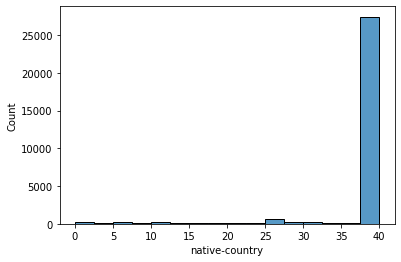

In [40]:
sns.histplot(data=dataset, x="native-country")

So this explain why the correlation is so low, we assume if we combine the different country we can achieve better correlatiojn

In [41]:
dataset.loc[dataset['native-country'] == 38]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital-difference,Class
0,39,5,13,4,0,1,4,1,40,38,2174,0
1,50,4,13,2,3,0,4,1,13,38,0,0
2,38,2,9,0,5,1,4,1,40,38,0,0
3,53,2,7,2,5,0,2,1,40,38,0,0
5,37,2,14,2,3,5,4,0,40,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,38,38,0,0
32557,40,2,9,2,6,0,4,1,40,38,0,1
32558,58,2,9,6,0,4,4,0,40,38,0,0
32559,22,2,9,4,0,3,4,1,20,38,0,0


In [42]:
dataset['native-country'] = dataset['native-country'].apply(lambda x: 0 if x == 38 else 1)

In [43]:
dataset.corr().Class.sort_values() 
# it increase to -0,03 its better than before

relationship         -0.249025
marital-status       -0.192288
native-country       -0.039746
workclass             0.014641
occupation            0.049795
race                  0.071458
sex                   0.215210
hours-per-week        0.225425
age                   0.239325
capital-difference    0.280177
education-num         0.329919
Class                 1.000000
Name: Class, dtype: float64

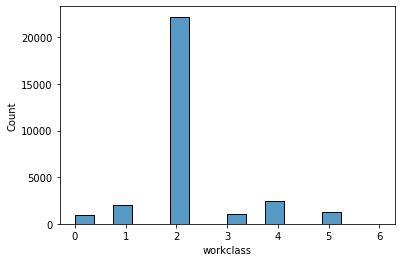

In [44]:
sns.histplot(data=dataset, x="workclass")

In [45]:
dataset['workclass'] = dataset['workclass'].apply(lambda x: 0 if x == 2 else 1)

In [46]:
dataset.corr().Class.sort_values() 
# it increase to 0,04 its better than before

relationship         -0.249025
marital-status       -0.192288
native-country       -0.039746
occupation            0.049795
race                  0.071458
workclass             0.114366
sex                   0.215210
hours-per-week        0.225425
age                   0.239325
capital-difference    0.280177
education-num         0.329919
Class                 1.000000
Name: Class, dtype: float64

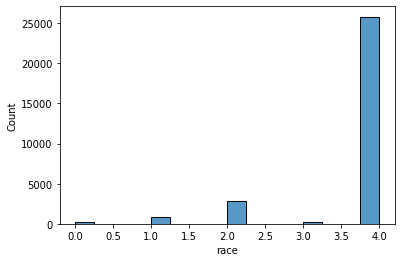

In [47]:
sns.histplot(data=dataset, x="race")

In [48]:
dataset['race'] = dataset['race'].apply(lambda x: 0 if x == 4.0 else 1)

In [49]:
dataset.corr().Class.sort_values() 
# it increase to -0,08 its better than before

relationship         -0.249025
marital-status       -0.192288
race                 -0.084566
native-country       -0.039746
occupation            0.049795
workclass             0.114366
sex                   0.215210
hours-per-week        0.225425
age                   0.239325
capital-difference    0.280177
education-num         0.329919
Class                 1.000000
Name: Class, dtype: float64

The correlation of the columns is increased but not that much, we don't know the best decision whether we drop the attribute or delete it since we didn't apply the classification model 

This data is considered bad if we talk about correlation (around -0,2 ~ 0,3) but lets see when the accuracy when the model can be applied

# Distandarisasi malah drop korelasinya goblok bet dah

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledDataset = pd.DataFrame(scaler.fit_transform(dataset.iloc[:,:-1]), columns = dataset.columns[:-1])

In [51]:
scaledDataset['Class'] = dataset['Class']

In [52]:
scaledDataset.head(1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital-difference,Class
0,0.045701,1.68671,1.137906,0.944977,-1.477128,-0.263805,-0.404145,0.694281,-0.074021,-0.311131,0.630562,0.0


In [53]:
scaledDataset.corr().Class

age                   0.010689
workclass             0.001813
education-num         0.001500
marital-status       -0.001847
occupation           -0.004097
relationship          0.000823
race                 -0.006877
sex                  -0.010866
hours-per-week       -0.002124
native-country        0.003176
capital-difference    0.001637
Class                 1.000000
Name: Class, dtype: float64